# Twitter Workbook

# Twitter Sentiment Analysis

This notebook aims to predict whether a person does or does not intend to get the COVID-19 vaccine by looking at Tweets.

In [6]:
import tweepy
import webbrowser
import time

import pandas as pd

from tweepy import OAuthHandler
from tweepy import API

import config

# auth.set_access_token(access_token, access_token_secret)



In [7]:
callback_uri = 'oob'

In [8]:
auth = OAuthHandler(config.consumer_key, config.consumer_secret, callback_uri)
auth.set_access_token(config.access_token, config.access_token_secret)
# redirect_url = auth.get_authorization_url()

In [6]:
# webbrowser.open(redirect_url)

NameError: name 'redirect_url' is not defined

In [ ]:
# user_pin_input = input("What's the pin value? ")

In [7]:
# auth.get_access_token(user_pin_input)

NameError: name 'user_pin_input' is not defined

In [9]:
api = API(auth, wait_on_rate_limit= True)

In [10]:
me = api.me()
print(me.screen_name)

cassienutter1


get text from your timeline into pandas

In [10]:
my_timeline = api.home_timeline()

In [11]:
print(my_timeline)

[]


In [13]:
columns = set()
allowed_types = [str, int]
tweet_data = []

for status in my_timeline:
#     print(status.text)
#     print (type(vas(status)))
    status_dict = dict(vars(status))
    keys = status_dict.keys()
    single_tweet_data = {}
    for k in keys:
        try:
            v_type = type(status_dict['k'])
        except:
            v_type = None
            
        if v_type != None:
            if v_type in allowed_types:
                single_tweet_data[k] = status_dict[k]
                columns.add(k)
    tweets_data.append(single_tweet_data )
        
header_cols = list(columns)

In [14]:
df = pd.DataFrame(tweet_data, columns= header_cols)
df.head()

""


In [17]:
#. get_status?

user = api.get_user('code')
user_timeline = user.timeline()
df2 = extract_timeline_as_df(user_timeline)
df2.head()

,retweet_count,lang,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,source_url,in_reply_to_status_id,id,text,favorite_count,quoted_status_id_str,quoted_status_id,source,id_str,in_reply_to_user_id,author
0,0,en,1377701530200113155,3323218917,satyalumesh,https://about.twitter.com/products/tweetdeck,1.377702e+18,1377709350337146882,@satyalumesh Not that I know of. But last week...,2,NaN,NaN,TweetDeck,1377709350337146882,3.323219e+09,code
1,18,en,NaN,NaN,NaN,https://buffer.com,NaN,1377685949405138944,RT @jongallant: If GitHub Codespaces in the br...,0,NaN,NaN,Buffer,1377685949405138944,NaN,code
2,0,en,1377632054339379204,1352047281726517248,codexpath2,https://about.twitter.com/products/tweetdeck,1.377632e+18,1377663896710901760,@codexpath2 @thecodercoder We have info here t...,0,NaN,NaN,TweetDeck,1377663896710901760,1.352047e+18,code
3,138,en,NaN,NaN,NaN,https://buffer.com,NaN,1377648956843433986,"Copying and pasting from… I mean, consulting S...",570,1376671673320083459,1.376672e+18,Buffer,1377648956843433986,NaN,code
4,7,en,NaN,NaN,NaN,https://buffer.com,NaN,1377380687808847872,RT @nitecoda1: Ever forgotten to import one of...,0,NaN,NaN,Buffer,1377380687808847872,NaN,code


In [16]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [ ]:
df3 = extract_timeline_as_df(user_timeline)

In [ ]:
df3.head()

In [ ]:
status_obj = api.get_status('1247966976951058433')
status_obj.text

In [ ]:
print(status_obj.geo)

In [ ]:
len(api.home_timeline())

In [ ]:
other_user = 'therock'
for i, status in enumerate(tweepy.Cursor(api.user_timeline, screen_name = other_user).items(20)):
    print (i, status.text)

In [ ]:
api.

In [ ]:
# query = '#vaccine'
# api.search(q = query)

In [ ]:
query = '#vaccine covid'
for i, status in enumerate(tweepy.Cursor(api.search, q= query).items(50)):
    print (i, status.text)

In [18]:
cursor = tweepy.Cursor(api.user_timeline, id= 'code', tweet_mode = 'extended').items(1)

In [19]:
for i in cursor:
    print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [20]:
cursor = tweepy.Cursor(api.user_timeline, id= 'code', tweet_mode = 'extended').items(1)

In [21]:
for i in cursor:
    print(i.full_text, i.lang, i.geo)

@satyalumesh Not that I know of. But last week we had a livestream with folks from @Tabnine_ and @ShinanYotam had some thoughts on that 🙊 https://t.co/Cg2Yb71vZ4 en None


In [24]:
cursor = tweepy.Cursor(api.search, q= 'vaccine', tweet_mode = 'extended').items(6)

In [25]:
for i in cursor:
    print(i.full_text, i.lang, i.geo)

@HBarca5 @GovMikeDeWine Um...hospital employee mandated to get the flu vaccine EVERY SINGLE YEAR. Covid vaccine should be no different. en None
RT @drsimonegold: .@GovRonDeSantis announced that he will take executive action this week against vaccine passports.

Every governor in Ame… en None
RT @HumanRights4UK: We must universally and TOTALLY reject "vaccine passports" at all costs. They will create a worldwide digital surveilla… en None
@BogochIsaac @CKKellyMartin @fordnation I signed my up a week ago to be notified about vaccine appointments at a pharmacy in Sharbot Lake (the closest option to Ottawa at the time). They still haven't contacted her. en None
May nabili bang @pfizer vaccine ang matandang inutil na damuhong batugang tumor ni satanas?

Si #galvezInutil, may na-pirmahan na bang supply agreement sa mga vaccine manufacturers?

#DutertePalpak
#dutertaeInutil
#IMPEACHdutertae
#OustDuterteNOW
#Oustduterte2021
#Oustdu30 https://t.co/t87Vm8LSKk tl None
RT @WSJ: The U.K.’s bold cal

In [59]:
number_of_tweets = 5
tweets = []
language = []
time = []

for i in tweepy.Cursor(api.search, q= 'vaccine covid -RT',  tweet_mode = 'extended', include_rts= False).items(number_of_tweets):
    tweets.append(i.full_text)
    language.append(i.lang)
    time.append(i.created_at)


In [60]:
df = pd.DataFrame({'time': time, 'language': language, 'tweets': tweets})

In [61]:
df

,time,language,tweets
0,2021-04-01 21:23:44,en,@RealNormalPod Someone posted a letter they'd ...
1,2021-04-01 21:23:42,en,check out this article everybody and please re...
2,2021-04-01 21:23:42,und,https://t.co/aJyl4WOsfl
3,2021-04-01 21:23:41,en,Made my first covid vaccine appointment let’s ...
4,2021-04-01 21:23:38,en,COVID-19 Vaccine Clinics Now Open to all #Indi...


In [37]:
df = df[~df.tweets.str.contains('RT')]

In [39]:
df.reset_index(drop= True, inplace= True)

In [69]:
df.to_csv('tweets.csv', mode= 'a', index= False, header= False)

In [64]:
df2 = pd.read_csv('tweets.csv')
df2

,Unnamed: 0,time,language,tweets
0,0,2021-04-01 21:23:44,en,@RealNormalPod Someone posted a letter they'd ...
1,1,2021-04-01 21:23:42,en,check out this article everybody and please re...
2,2,2021-04-01 21:23:42,und,https://t.co/aJyl4WOsfl
3,3,2021-04-01 21:23:41,en,Made my first covid vaccine appointment let’s ...
4,4,2021-04-01 21:23:38,en,COVID-19 Vaccine Clinics Now Open to all #Indi...


In [65]:
number_of_tweets = 5
tweets = []
language = []
time = []

for i in tweepy.Cursor(api.search, q= 'vaccine covid -RT',  tweet_mode = 'extended', include_rts= False).items(number_of_tweets):
    tweets.append(i.full_text)
    language.append(i.lang)
    time.append(i.created_at)

In [66]:
df3 = pd.DataFrame({'time': time, 'language': language, 'tweets': tweets})
df3

,time,language,tweets
0,2021-04-01 21:37:39,en,I can’t believe I just saw a title saying “cov...
1,2021-04-01 21:37:37,en,Don't freak out if you get these side effects ...
2,2021-04-01 21:37:35,en,"Hello ⁦@drpatesblog⁩, this is the second artic..."
3,2021-04-01 21:37:34,en,"Thing is, I’m not even anti vax or anything an..."
4,2021-04-01 21:37:31,en,i got my covid vaccine besties 😁 https://t.co/...


In [67]:
df3.to_csv('tweets.csv', index= False)

## Search 30 day tweets

In [ ]:
# function to turn results into DataFrame
def extract_text_as_df(text_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in text_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [107]:
query = 'vaccine covid -RT'
results_30 = api.search_30_day('datacollection', query, maxResults= 10)
# results_30
old_results_df = extract_text_as_df(results_30)
old_results_df

,retweet_count,lang,in_reply_to_status_id_str,in_reply_to_user_id_str,favorite_count,source_url,in_reply_to_status_id,id,text,in_reply_to_screen_name,in_reply_to_user_id,source,reply_count,filter_level,id_str,quote_count,author
0,0,en,NaN,NaN,0,http://twitter.com/#!/download/ipad,NaN,1377762606631383040,4 ways Australia's COVID vaccine rollout has b...,NaN,NaN,Twitter for iPad,0,low,1377762606631383040,0,SandraSearle
1,0,en,NaN,NaN,0,http://www.socialnewsdesk.com,NaN,1377762605486465027,All Californians age 50 and older are now elig...,NaN,NaN,SocialNewsDesk,0,low,1377762605486465027,0,CBSLA
2,0,en,NaN,NaN,1,http://twitter.com/download/iphone,NaN,1377762601065705476,First round of the COVID vaccine: ✅,NaN,NaN,Twitter for iPhone,1,low,1377762601065705476,0,hayleemarissa_
3,0,en,1377680153589993473,789131600743239680,0,http://twitter.com/download/iphone,1.377680e+18,1377762594208034817,@HunterBanks96 Round one of covid vaccine down!,HunterBanks96,7.891316e+17,Twitter for iPhone,0,low,1377762594208034817,0,LisaAS2016
4,0,en,NaN,NaN,0,http://twitter.com/download/iphone,NaN,1377762592060538882,#vaccination #AstraZeneca #COVID19 #vaccine h...,NaN,NaN,Twitter for iPhone,0,low,1377762592060538882,0,_HoniSoitQuiMal
5,0,en,NaN,NaN,0,https://mobile.twitter.com,NaN,1377762582531035136,Easter egg punt? Coronavirus spike good reason...,NaN,NaN,Twitter Web App,0,low,1377762582531035136,0,JoyceHutchens3
6,0,en,NaN,NaN,0,NaN,NaN,1377762577653059585,New post (Pakistan: Hundreds of Covid-19 vacci...,NaN,NaN,,0,low,1377762577653059585,0,zacnetwork1
7,0,en,NaN,NaN,0,http://twitter.com/download/iphone,NaN,1377762561819602946,Waiting for my first dose of the COVID vaccine...,NaN,NaN,Twitter for iPhone,0,low,1377762561819602946,0,AshleeCoffeyOWH
8,0,en,NaN,NaN,0,http://twitter.com/#!/download/ipad,NaN,1377762559957331969,Pfizer vaccine produces ‘off the scale’ immune...,NaN,NaN,Twitter for iPad,0,low,1377762559957331969,0,llomenzo
9,0,en,NaN,NaN,0,http://twitter.com/download/iphone,NaN,1377762527229132803,HOW AM I PROTECTING MYSELF BY GETTING THE VACC...,NaN,NaN,Twitter for iPhone,0,low,1377762527229132803,0,sdotpettaway


In [70]:
# pip install googletrans

     |████████████████████████████████| 55 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 994 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 4.2 MB/s eta 0:00:01
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=ad1fd53af6e10629362e7cd2aeb3e1a74783e5f3f5ba1465e11eea204507faf7
  Stored in directory: /Users/cassienutter/Library/Caches/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
Note: you may need to restart the kernel to use updated packages.


In [11]:
df = pd.read_csv('tweets.csv')

In [12]:
lang_df = df.sort_values('language')

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

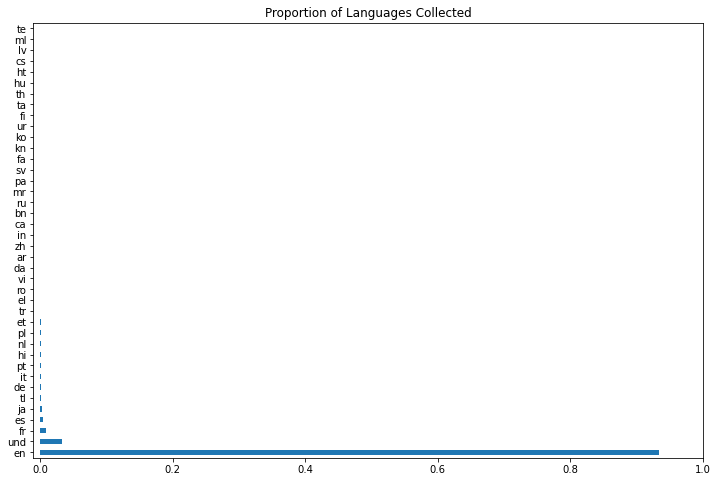

In [14]:
plt.figure(figsize= (12, 8))
lang_df.language.value_counts(normalize=True).plot(kind= 'barh')
plt.title('Proportion of Languages Collected')
plt.xlim(-.01, 1)
plt.show()

In [15]:
lang_df.language.value_counts(normalize=True)

en     0.934466
und    0.032621
fr     0.008544
es     0.004078
ja     0.002427
tl     0.001942
de     0.001553
it     0.001456
pt     0.001262
hi     0.001165
nl     0.001068
pl     0.000874
et     0.000874
tr     0.000680
el     0.000680
ro     0.000583
vi     0.000485
da     0.000485
ar     0.000388
zh     0.000388
in     0.000388
ca     0.000291
bn     0.000291
ru     0.000291
mr     0.000291
pa     0.000194
sv     0.000194
fa     0.000194
kn     0.000194
ko     0.000194
ur     0.000194
fi     0.000194
ta     0.000194
th     0.000194
hu     0.000194
ht     0.000097
cs     0.000097
lv     0.000097
ml     0.000097
te     0.000097
Name: language, dtype: float64

In [17]:
# what are these languages? get table from url
URL = 'https://developer.twitter.com/en/docs/twitter-for-websites/supported-languages'
tables = pd.read_html(URL)
print("There are : ",len(tables)," tables")
print(tables[0])

lang_table = tables[0]

There are :  1  tables
                        0              1
0                    Name  Language code
1       English (default)             en
2                  Arabic             ar
3                 Bengali             bn
4                   Czech             cs
5                  Danish             da
6                  German             de
7                   Greek             el
8                 Spanish             es
9                 Persian             fa
10                Finnish             fi
11               Filipino            fil
12                 French             fr
13                 Hebrew             he
14                  Hindi             hi
15              Hungarian             hu
16             Indonesian             id
17                Italian             it
18               Japanese             ja
19                 Korean             ko
20                  Malay            msa
21                  Dutch             nl
22              Norwegian         

In [18]:
# lang_table
header_row = 0
lang_table.columns = lang_table.iloc[header_row]
lang_table = lang_table.drop(header_row)
lang_table.reset_index(drop= True, inplace= True)
lang_table.replace('English (default)', 'English', inplace= True)
lang_table

,Name,Language code
0,English,en
1,Arabic,ar
2,Bengali,bn
3,Czech,cs
4,Danish,da
5,German,de
6,Greek,el
7,Spanish,es
8,Persian,fa
9,Finnish,fi


In [19]:
lang_table.to_csv('data/languages.csv', index= False)

In [25]:
duped = df[df.duplicated(subset= 'tweets')]

In [34]:
pd.set_option('display.max_colwidth', None)

In [35]:
duped

,time,language,tweets
812,2021-04-01 21:33:38,en,"⚠By scheduling your COVID-19 vaccine appointment you are confirming that you are eligible for a COVID-19 vaccine and that you are at least 16 years of age⚠️\nThis event is for anyone eligible in Phase 1A Tiers 1 &amp; 2, Phase 1B Tiers 1, 2, 3, and 4."
905,2021-04-01 21:30:59,en,"Having trouble getting an appointment for the COVID vaccine? If you're willing to drive to Salisbury, starting tomorrow any eligible Marylander will be able to get the shot without an appointment. @GovLarryHogan says they plan to add walk-up lines at other mass vaccination sites"
1281,2021-04-01 21:21:57,en,@annezinkmd Oops. \n\nI'm sure they caught any previous mix-ups...it's not like J&amp;J ever lied about product ingredients before....what's that? \n\nCancer causing asbestos in powder for decades? They knew all along? 4 Billion $ settlement? Oh. Welllll...\n\nhttps://t.co/CYUDPtLCn3
2502,2021-04-01 20:50:38,en,@GovParsonMO 57 we’ve no need to thank for\nhis vaccine distribution stank.\nLengthy drives he endorsed;\ncities underresourced. No state-\nwide mask mandate? Still his plank!\nPublic health Parson failed to police;\nCOVID cases he caused to increase.\n\n@COVIDOversight 👇🏼 @VP\nhttps://t.co/DPzYEbX1Es
2506,2021-04-01 20:50:27,en,@GovParsonMO 57 we’ve no need to thank for\nhis vaccine distribution stank.\nLengthy drives he endorsed;\ncities underresourced. No state-\nwide mask mandate? Still his plank!\nPublic health Parson failed to police;\nCOVID cases he caused to increase.\n\n@COVIDOversight 👇🏼 @VP\nhttps://t.co/DPzYEbX1Es
2515,2021-04-01 20:50:14,en,@GovParsonMO 57 we’ve no need to thank for\nhis vaccine distribution stank.\nLengthy drives he endorsed;\ncities underresourced. No state-\nwide mask mandate? Still his plank!\nPublic health Parson failed to police;\nCOVID cases he caused to increase.\n\n@COVIDOversight 👇🏼 @VP\nhttps://t.co/DPzYEbX1Es
2523,2021-04-01 20:50:05,en,@GovParsonMO 57 we’ve no need to thank for\nhis vaccine distribution stank.\nLengthy drives he endorsed;\ncities underresourced. No state-\nwide mask mandate? Still his plank!\nPublic health Parson failed to police;\nCOVID cases he caused to increase.\n\n@COVIDOversight 👇🏼 @VP\nhttps://t.co/DPzYEbX1Es
2535,2021-04-01 20:49:51,en,"hopefully getting discharged today! and starting therapy, new medicine and im getting a covid vaccine referral 💕"
3464,2021-04-01 20:26:27,en,Information about COVID-19 vaccine eligibility and availability can change quickly. Please always check with the health unit or the health organization before you try to book an appointment.
4455,2021-04-01 20:00:14,en,For more information on COVID-19 vaccine clinics please visit: https://t.co/hbF0NyDM5a


In [36]:
# remove duplicates
df.drop_duplicates(subset= 'tweets', keep= 'first', inplace= True)
df.reset_index(drop= True, inplace= True)
df.tweets.duplicated().sum()

In [38]:
df.tweets.duplicated().sum()

0

In [41]:
df[df['language'] == 'und']

,time,language,tweets
1,2021-04-01 21:58:44,und,@and_kell @ds13_manon https://t.co/sKnTctMKcF
19,2021-04-01 21:58:14,und,https://t.co/j2braq4wFx
29,2021-04-01 21:57:58,und,@Pavlos80322302 @ds13_manon https://t.co/sKnTctMKcF
79,2021-04-01 21:56:21,und,👍🏼👍🏼👍🏼👍🏼 https://t.co/m68KkEqpOe
97,2021-04-01 21:55:44,und,https://t.co/Stomi0I13k
...,...,...,...
10146,2021-04-02 12:34:24,und,@JordanSchachtel https://t.co/SgbunjBR8p
10156,2021-04-02 12:34:01,und,@NaddiiaB @Flobga @Conseil_Etat https://t.co/ca6spF82qm
10184,2021-04-02 12:33:06,und,@annika1021 \n\nhttps://t.co/oN4rAXUfCc
10207,2021-04-02 12:32:21,und,https://t.co/6OsrUyOdNi


In [42]:
df = df[df['language'] != 'und']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9948 entries, 0 to 10283
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      9948 non-null   object
 1   language  9948 non-null   object
 2   tweets    9948 non-null   object
dtypes: object(3)
memory usage: 310.9+ KB


In [50]:
lang_table.columns

Index(['Name', 'Language code'], dtype='object', name=0)

In [53]:
df

,time,language,tweets
0,2021-04-01 21:58:45,en,"Concerning the use of aborted baby tissue in the J&amp;J Covid vaccine:\n\n“The J&amp;J vaccine has sparked debate among some religious communities because it was developed from stem cells obtained during two abortions decades ago.”\n\nEvil is still evil, even if it was decades ago."
2,2021-04-01 21:58:43,pt,Estão vacinando 3 MILHÕES de pessoas por dia nesse país. Não é possível uma coisa dessa. https://t.co/iNP7RvWsat
3,2021-04-01 21:58:42,en,imagine an animal getting the covid-19 vaccine b4 a human
4,2021-04-01 21:58:40,en,Definition of a microstate: https://t.co/8N0R8Mhl73\n\nSource of vaccine data: https://t.co/0RQFJPTrZZ
5,2021-04-01 21:58:33,en,"If I’ve Had COVID-19, Do I Still Need Two Doses of Vaccine? https://t.co/08AiBgfEHQ"
...,...,...,...
10279,2021-04-02 12:30:10,en,@eddwilson A vaccine that protects and prevents the spread of infection such as smallpox has been certificated to allow travel to infected areas for years. \nCovid vaccines only mitigate or reduce risk and do not prevent onward infection so suggesting 'passports' is a bit disingenuous
10280,2021-04-02 12:30:10,en,Johnson &amp; Johnson to begin testing COVID-19 vaccine on younger teens https://t.co/lzONKVTVB3
10281,2021-04-02 12:30:10,en,"The U.S. drug regulator gave Moderna Inc clearance to speed up output of its COVID-19 vaccine by letting it fill a single vial with up to 15 doses, with the United States banking on rapid immunisation to stem the spread of the deadly virus.​ https://t.co/rqtCFCEegV"
10282,2021-04-02 12:30:09,en,We seem to be becoming a dictator country.\n\nHere's how you can be forced to get the Covid vaccine in the U.S. https://t.co/mArWOFNBHu


In [70]:
df2 = df.merge(lang_table, how= 'inner', left_on= 'language', right_on= 'Language code')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9895 entries, 0 to 9894
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   time           9895 non-null   object
 1   language       9895 non-null   object
 2   tweets         9895 non-null   object
 3   Name           9895 non-null   object
 4   Language code  9895 non-null   object
dtypes: object(5)
memory usage: 463.8+ KB


In [71]:
df2.drop(columns = ['language', 'Language code'], inplace= True)
df2.rename(columns={'Name': 'language'}, inplace= True)
df2

,time,tweets,language
0,2021-04-01 21:58:45,"Concerning the use of aborted baby tissue in the J&amp;J Covid vaccine:\n\n“The J&amp;J vaccine has sparked debate among some religious communities because it was developed from stem cells obtained during two abortions decades ago.”\n\nEvil is still evil, even if it was decades ago.",English
1,2021-04-01 21:58:42,imagine an animal getting the covid-19 vaccine b4 a human,English
2,2021-04-01 21:58:40,Definition of a microstate: https://t.co/8N0R8Mhl73\n\nSource of vaccine data: https://t.co/0RQFJPTrZZ,English
3,2021-04-01 21:58:33,"If I’ve Had COVID-19, Do I Still Need Two Doses of Vaccine? https://t.co/08AiBgfEHQ",English
4,2021-04-01 21:58:31,"My epidural was delayed again, somehow my covid vaccine does not interact well with an epidural. SOOOOO I should be getting it on my birthday. Yay. \n\n So far I have 1-2 dr appointments a week this entire month.\n \nOn the upside they've given me proper muscle relaxers this time.",English
...,...,...,...
9890,2021-04-02 14:17:47,عدالتی حکم کے برخلاف، نجی اسپتال روسی ویکسین کی من مانی قیمت وصول کرنے لگا\nhttps://t.co/7ZhR4t2jLn\n\n#Pakistan #Karachi #Medical #HealthCare #HealthTech #Pharma #CoronaVirus #Covid_19 #vaccine #vaccination #SputnikV #price #business #SputnikVaccineLifeSaver #Sinopharm #hospi... https://t.co/DyCaOR3ZRi,Urdu
9891,2021-04-02 13:28:24,ایم ایس سیرل کمپنی لمیٹڈ کاچینی کمپنی لیوزون مافارم انکارپوریشن کے ساتھ ملک میں کورونا وائرس ویکسین (V-01) کی تیاری کا معاہدہ ہو گیا\nhttps://t.co/6M4DwiC5Fn,Urdu
9892,2021-04-02 13:55:25,টিকা নিলেও নিতে হবে সাবধানতা।\n#coronavirus #CoronavirusVaccine #UttarPradesh \n\nhttps://t.co/nHoUZKkSRV,Bengali
9893,2021-04-02 13:42:54,"সপরিবার কোভিড টিকা নিলেন অমিতাভ, বাকি শুধু অভিষেক \n@SrBachchan \n\nhttps://t.co/JdietMQ2xU",Bengali


In [72]:
df2.rename(columns={'Name': 'language'}, inplace= True)

In [74]:
df2['time'] = pd.to_datetime(df2['time']).dt.date

In [75]:
df2

,time,tweets,language
0,2021-04-01,"Concerning the use of aborted baby tissue in the J&amp;J Covid vaccine:\n\n“The J&amp;J vaccine has sparked debate among some religious communities because it was developed from stem cells obtained during two abortions decades ago.”\n\nEvil is still evil, even if it was decades ago.",English
1,2021-04-01,imagine an animal getting the covid-19 vaccine b4 a human,English
2,2021-04-01,Definition of a microstate: https://t.co/8N0R8Mhl73\n\nSource of vaccine data: https://t.co/0RQFJPTrZZ,English
3,2021-04-01,"If I’ve Had COVID-19, Do I Still Need Two Doses of Vaccine? https://t.co/08AiBgfEHQ",English
4,2021-04-01,"My epidural was delayed again, somehow my covid vaccine does not interact well with an epidural. SOOOOO I should be getting it on my birthday. Yay. \n\n So far I have 1-2 dr appointments a week this entire month.\n \nOn the upside they've given me proper muscle relaxers this time.",English
...,...,...,...
9890,2021-04-02,عدالتی حکم کے برخلاف، نجی اسپتال روسی ویکسین کی من مانی قیمت وصول کرنے لگا\nhttps://t.co/7ZhR4t2jLn\n\n#Pakistan #Karachi #Medical #HealthCare #HealthTech #Pharma #CoronaVirus #Covid_19 #vaccine #vaccination #SputnikV #price #business #SputnikVaccineLifeSaver #Sinopharm #hospi... https://t.co/DyCaOR3ZRi,Urdu
9891,2021-04-02,ایم ایس سیرل کمپنی لمیٹڈ کاچینی کمپنی لیوزون مافارم انکارپوریشن کے ساتھ ملک میں کورونا وائرس ویکسین (V-01) کی تیاری کا معاہدہ ہو گیا\nhttps://t.co/6M4DwiC5Fn,Urdu
9892,2021-04-02,টিকা নিলেও নিতে হবে সাবধানতা।\n#coronavirus #CoronavirusVaccine #UttarPradesh \n\nhttps://t.co/nHoUZKkSRV,Bengali
9893,2021-04-02,"সপরিবার কোভিড টিকা নিলেন অমিতাভ, বাকি শুধু অভিষেক \n@SrBachchan \n\nhttps://t.co/JdietMQ2xU",Bengali


In [66]:
df2

,time,tweets,language
0,2021-04-01 21:58:45,"Concerning the use of aborted baby tissue in the J&amp;J Covid vaccine:\n\n“The J&amp;J vaccine has sparked debate among some religious communities because it was developed from stem cells obtained during two abortions decades ago.”\n\nEvil is still evil, even if it was decades ago.",English
1,2021-04-01 21:58:42,imagine an animal getting the covid-19 vaccine b4 a human,English
2,2021-04-01 21:58:40,Definition of a microstate: https://t.co/8N0R8Mhl73\n\nSource of vaccine data: https://t.co/0RQFJPTrZZ,English
3,2021-04-01 21:58:33,"If I’ve Had COVID-19, Do I Still Need Two Doses of Vaccine? https://t.co/08AiBgfEHQ",English
4,2021-04-01 21:58:31,"My epidural was delayed again, somehow my covid vaccine does not interact well with an epidural. SOOOOO I should be getting it on my birthday. Yay. \n\n So far I have 1-2 dr appointments a week this entire month.\n \nOn the upside they've given me proper muscle relaxers this time.",English
...,...,...,...
9890,2021-04-02 14:17:47,عدالتی حکم کے برخلاف، نجی اسپتال روسی ویکسین کی من مانی قیمت وصول کرنے لگا\nhttps://t.co/7ZhR4t2jLn\n\n#Pakistan #Karachi #Medical #HealthCare #HealthTech #Pharma #CoronaVirus #Covid_19 #vaccine #vaccination #SputnikV #price #business #SputnikVaccineLifeSaver #Sinopharm #hospi... https://t.co/DyCaOR3ZRi,Urdu
9891,2021-04-02 13:28:24,ایم ایس سیرل کمپنی لمیٹڈ کاچینی کمپنی لیوزون مافارم انکارپوریشن کے ساتھ ملک میں کورونا وائرس ویکسین (V-01) کی تیاری کا معاہدہ ہو گیا\nhttps://t.co/6M4DwiC5Fn,Urdu
9892,2021-04-02 13:55:25,টিকা নিলেও নিতে হবে সাবধানতা।\n#coronavirus #CoronavirusVaccine #UttarPradesh \n\nhttps://t.co/nHoUZKkSRV,Bengali
9893,2021-04-02 13:42:54,"সপরিবার কোভিড টিকা নিলেন অমিতাভ, বাকি শুধু অভিষেক \n@SrBachchan \n\nhttps://t.co/JdietMQ2xU",Bengali


In [77]:
import seaborn as sns
sns.set_style('whitegrid')

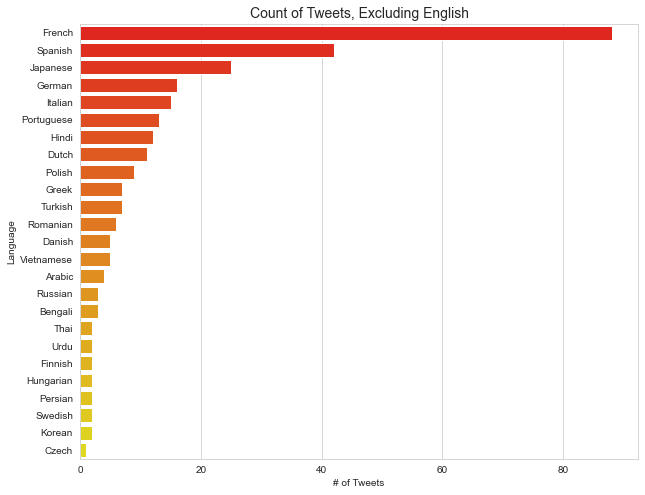

In [87]:
# countplot that excludes English to see detail
plt.figure(figsize= (10, 8))
sns.countplot(y= 'language', data= df2, palette='autumn',
              order= df2.language.value_counts().iloc[1:].index)
plt.title('Count of Tweets, Excluding English', fontsize= 14)
plt.xlabel('# of Tweets')
plt.ylabel('Language')
plt.show()

## Text sentiment

In [ ]:
# remove urls? https: http: ...

In [ ]:
# use textblob?